# Lab 4 Project (Titanic)
**Author:** Elom Gbogbo 

**Date:** April 4, 2025

**Objective:** Predict a continuous numeric target like fare using the Titanic dataset by building a regression model using key features such as family size, sex, and age.



## Introduction
This project analyzes the Titanic dataset using Seaborn to predict passenger fare based on features like gender, and age. We’ll clean the data, train different regression models, and explore techniques to improve its performance through feature selection and visualization. 


## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [64]:

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import PolynomialFeatures


## Section 1. Import and Inspect the Data

### Load the Titanic dataset and inspect the data




In [65]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation



Prepare Titanic data for regression modeling.

In [66]:
# Impute missing values for age using the median:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Drop rows with missing fare
titanic = titanic.dropna(subset=['fare'])

# Create a numerical variables
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical data to numeric:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

## Section 3. Feature Selection and Justification

In [67]:
# Case #1: age only
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2: family_size only
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3: age + family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4. sex only
X4 = titanic[['sex']]
y4 = titanic['fare']

Reflection 3 Questions:

Why might these features affect a passenger’s fare: I believe that sex, age, and family_size might all have different aspects to affect fare. Discounts might be available based on a group rate of family size, certain ages, and genders. 

List all available features: survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone

Which other features could improve predictions and why: pclass, people who are more wealthy likely paid more for a ticket 

How many variables are in your Case 4: 1

Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: When thinking of sex as an input, I believe that sex could affect how much people paid for tickets. I also thought sex would be a good feature to use since it is categorical and binary. Converting it to numerical value is easier for linear regression as well so I believe it could be a good input. 

## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the Data 




In [68]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [69]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [70]:
# Case 1
print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", root_mean_squared_error(y1_test, y1_pred_test))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))
print()

# Case 2
print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", root_mean_squared_error(y2_test, y2_pred_test))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))
print()

# Case 3
print("Case 3: Training R²:", r2_score(y3_train, y3_pred_train))
print("Case 3: Test R²:", r2_score(y3_test, y3_pred_test))
print("Case 3: Test RMSE:", root_mean_squared_error(y3_test, y3_pred_test))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y3_pred_test))
print()

# Case 4
print("Case 4: Training R²:", r2_score(y4_train, y4_pred_train))
print("Case 4: Test R²:", r2_score(y4_test, y4_pred_test))
print("Case 4: Test RMSE:", root_mean_squared_error(y4_test, y4_pred_test))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y4_pred_test))


Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688

Case 4: Training R²: 0.023885614755059348
Case 4: Test R²: 0.09936584220882583
Case 4: Test RMSE: 36.09746477477291
Case 4: Test MAE: 24.24249103567552


Reflection 4:

Compare the train vs test results for each.

1. Did Case 1 overfit or underfit? Explain: Case 1 shows underfitting. Both the train and test R2 values are very low with high errors indicating that the model did poorly to evaluate this data. 
2. Did Case 2 overfit or underfit? Explain: Case 2 also shows underfitting. Although the train and test R2 values slightly improved compared to Case 1, it still performed poorly with high errors and remains underfit. 
3. Did Case 3 overfit or underfit? Explain: Case 3 captured more than the previous cases with higher training R² and test R², but it still has low R² values and high errors, making it underfit."
4. Did Case 4 overfit or underfit? Explain: Case 4 performed the best, while still being underfit. In training, it had a low R2, but in test, it had the highest R2 of all cases with having the smallest errors. 

Adding Age

1. Did adding age improve the model: Age helped improved the model.
2. Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): Age might affect ticket prices potentially because discounted fare for certain ages - mostly like for children and elders. 

Worst

1. Which case performed the worst: Case 1 was the worst.
2. How do you know: The R² had the lowest test score and the worst errors.
3. Do you think adding more training data would improve it (and why/why not): It might help the model slightly, but I do not believe it would help significantly. 

Best

1. Which case performed the best: Case 4 was the best. 
2. How do you know: For starters, the R² was the highest out of the cases. 
3. Do you think adding more training data would improve it (and why/why not): I think it could help to add more data or select better features like pclass and family size. Adding features will mostly like improve it more than just adding more data. 

## Section 5. Compare Alternative Models



### 5.1 Ridge Regression (L2 penalty)

In [71]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)


### 5.2 Elastic Net (L1 +L2 combined)

In [72]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

In [73]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_poly = poly_model.predict(X_test_poly)

### 5.4 Visualize Polynomial Cubic Fit

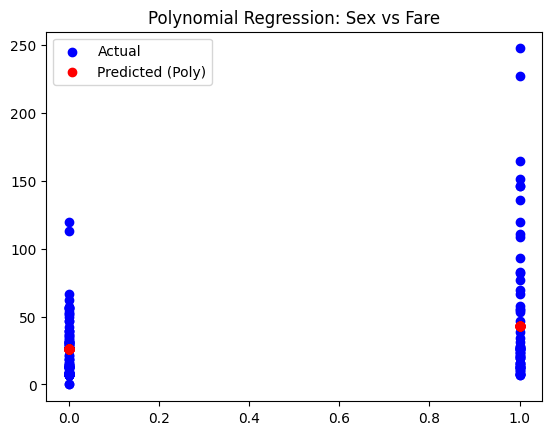

In [74]:
plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title('Polynomial Regression: Sex vs Fare')
plt.show()

Reflections (in a Markdown cell):

1. What patterns does the cubic model seem to capture: The cubic model showed that males and females had different average fares. It also suggests that women paid more than males.
2. Where does it perform well or poorly: It performed well for passengers with fares that were closes to the predicted values. It performs poorly for passengers with fares that are far from the predicted averages, like passengers with high fares. (>100)
3. Did the polynomial fit outperform linear regression: No, linear regression performed better than polynomial regression for Case 4. 
4. Where (on the graph or among which kinds of data points) does it fit best: this model fits best for passengers near the predicted values - males with fares close to 0 and females with fares close to 50.

### 5.4 Compare All Models

In [75]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y4_pred_test)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.099
Linear RMSE: 36.10
Linear MAE: 24.24

Ridge R²: 0.099
Ridge RMSE: 36.10
Ridge MAE: 24.24

ElasticNet R²: 0.068
ElasticNet RMSE: 36.71
ElasticNet MAE: 24.33

Polynomial R²: 0.099
Polynomial RMSE: 36.10
Polynomial MAE: 24.24



### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)


In [76]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_poly = poly_model.predict(X_test_poly)

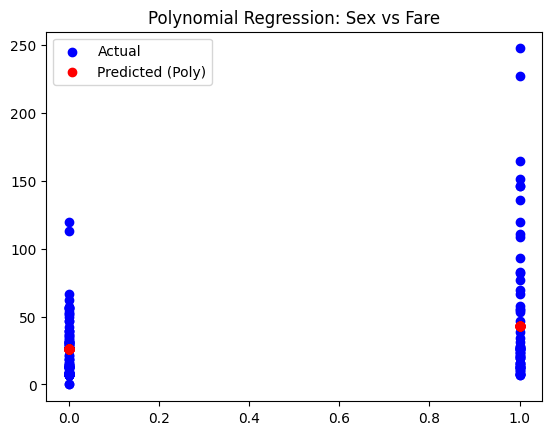

In [77]:
plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title('Polynomial Regression: Sex vs Fare')
plt.show()

### Section 6. Final Thoughts and Insights

6.1 Summarize Findings
1. What features were most useful? Sex and age were the most useful features in this model but not ideal to predict fare. Sex perfomed the best out of all cases, and age added some improvement in the later cases ran. There are other features that would been a better fit than sex. 

2. What regression model performed best? Linear regression performed the best as it had the highest R2 test score and lower errors even though all cases were underfit. 

3. How did model complexity or regularization affect results? Neither model performed well enough to identity fare. Linear regression (the simpler model) did not perform well but when adding complexity with polynomial regression, it did not perform as well either.

6.2 Discuss Challenges
1. Was fare hard to predict? Why? Fare was hard to predict since the all models were underfit with low R2 values and high error values based of the features selected. If different features like pclass were used, I believe this model would been better executed. 

2. Did skew or outliers impact the models? I believe that both skew and outlier hurt the performance of the models as there were many low fares and with a few high fares and outliers that made the models underfit from poor performance. 

6.3 Optional Next Steps
1. Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)

2. Try predicting age instead of fare

3. Explore log transformation of fare to reduce skew